# **Sentimen Analisis Ulasan Gojek di Google Play Store**

Nama : M Mahfudl Awaludin<br>
Email : mahfudawaludin.009@gmail.com

Selamat datang dalam proyek Sentimen Analisis Ulasan Gojek di Google Play Store! Dalam ekosistem dompet digital yang semakin berkembang, ulasan pengguna memainkan peran penting dalam membentuk persepsi dan pengalaman pengguna terhadap aplikasi tersebut. Proyek ini bertujuan untuk mengeksplorasi analisis sentimen guna memahami bagaimana pengguna merasakan dan mengungkapkan pendapat mereka tentang Gojek di Play Store.

**Apa itu Analisis Sentimen?**

Analisis sentimen adalah cabang dari pemrosesan bahasa alami (Natural Language Processing, NLP) yang digunakan untuk menganalisis teks dan mengidentifikasi apakah teks tersebut memiliki sentimen positif, negatif, atau netral. Dalam proyek ini, fokus analisis diarahkan pada ulasan pengguna Gojek, termasuk feedback, keluhan, serta pujian yang diberikan pengguna.

**Mengapa Analisis Sentimen untuk Gojek?**

Sebagai salah satu dompet digital paling populer di Indonesia, Gojek memiliki ribuan ulasan di Play Store. Dengan teknik analisis sentimen, pemahaman yang lebih mendalam dapat diperoleh mengenai:

1. Bagaimana pengguna merasakan pengalaman dalam menggunakan Gojek, termasuk kemudahan transaksi, cashback, atau promo yang ditawarkan.
2. Apa saja keluhan umum dari pengguna, seperti kendala top-up, keamanan akun, atau kegagalan transaksi.
3. Sejauh mana pembaruan aplikasi berdampak pada pengalaman pengguna, apakah memperbaiki atau justru menimbulkan masalah baru.

**Langkah-langkah Analisis Sentimen:**

1. Pengumpulan Data Ulasan:
  - Teknik web scraping digunakan untuk mengumpulkan ulasan pengguna Gojek dari Google Play Store.
  - Data yang diambil mencakup teks ulasan, rating (skor), serta metadata terkait lainnya.

2. Praktek Pengolahan Teks (Text Preprocessing):
Membersihkan teks ulasan dengan beberapa teknik, seperti:
  - Menghapus stopwords (kata-kata umum yang tidak memiliki makna penting seperti "dan", "di", "untuk").
  - Melakukan stemming atau lemmatization untuk menyederhanakan kata ke bentuk dasarnya.
  - Menghapus karakter khusus dan tanda baca yang tidak relevan.

3. Ekstraksi Fitur:
  - Teks ulasan yang telah dibersihkan akan dikonversi menjadi format numerik yang bisa dipahami oleh model machine learning, menggunakan teknik TF-IDF atau Word Embeddings.

4. Pelabelan Sentimen: Kita akan menggunakan skor ulasan (misalnya, 1-2 sebagai Negatif, 3 sebagai Netral, dan 4-5 sebagai Positif) untuk memberikan label sentimen pada setiap ulasan.

5. Pelatihan Model Machine Learning: Untuk memprediksi sentimen ulasan, kita akan menggunakan beberapa algoritma deep learning, seperti LSTM (Long Short-Term Memory) atau CNN (Convolutional Neural Networks), yang efektif untuk menangani data teks. Model ini akan dilatih menggunakan data ulasan yang telah dilabeli untuk mempelajari pola sentimen.

6. Evaluasi Model: Setelah model dilatih, kita akan mengevaluasi akurasi model pada testing set untuk memastikan bahwa model dapat memprediksi sentimen dengan baik. Target akurasi minimal untuk proyek ini adalah 85%.

7. Inferensi dan Prediksi: Setelah model siap, kita akan menggunakannya untuk memprediksi sentimen ulasan baru dan melihat apakah ulasan tersebut cenderung positif, negatif, atau netral.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
%pip install tqdm

from tqdm import tqdm
tqdm.pandas()

### Loading Dataset

In [ ]:
url = '/content/reviews_gojek.csv'
df = pd.read_csv(url)

# Menampilkan dataframe sebagai tabel
df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,9ab8279b-f217-4514-9ca6-0a8102ea6f45,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,baik sangat membantu sekali,5,0,5.13.1,2025-04-20 16:13:51,NaN,NaN,5.13.1
1,e9e37f46-0444-4a72-b377-fec0a7f580c1,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,halo pihak gojek saya mau daftar jadi gojek gi...,5,0,5.17.1,2025-04-20 16:02:20,NaN,NaN,5.17.1
2,f1232d63-700d-4b39-af95-a5ad0533b7a3,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,mantap,5,0,NaN,2025-04-20 15:55:19,NaN,NaN,NaN
3,c5de759d-9397-4500-ac26-575f28cc4338,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"akun tiba2 tersuspen, pasti gara2 kasih bad re...",1,0,NaN,2025-04-20 15:55:15,"Hai, Kak Muhammad. Mohon maaf atas kendala yan...",2025-04-20 16:07:30,NaN
4,9c8d6711-ddda-4eb4-8ccb-5fdea198e02b,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,mantap,1,0,NaN,2025-04-20 15:49:10,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
9995,4289f498-ba31-4e7b-a30b-6b573f901bf5,Ilalang Setiawan,https://play-lh.googleusercontent.com/a-/ALV-U...,Udah sejam nyari kurir ga nemu nemu,1,1,4.21.1,2025-02-28 16:27:30,"Mohon maaf atas ketidaknyamanannya, Kak Setiaw...",2025-03-01 07:40:51,4.21.1
9996,f70cf072-daac-4baf-9b24-1a90ef15711c,Aulia Indahwardhani,https://play-lh.googleusercontent.com/a-/ALV-U...,gojek sangat membantu apalagi gofood nya yang ...,4,11,5.12.1,2025-02-28 16:21:38,NaN,NaN,5.12.1
9997,bfc9ed23-051f-4c8a-916e-9ad30f9b3609,Riski Savitri,https://play-lh.googleusercontent.com/a-/ALV-U...,Makin parah ini aplikasi gofood nya. Sy udah n...,1,2,5.11.1,2025-02-28 16:20:17,"Hai Kak Riski, mohon maaf atas ketidaknyamanan...",2025-03-01 07:38:04,5.11.1
9998,9f76e2f2-20d6-4a7c-a928-a727c002fcd3,Fahrizal Husain,https://play-lh.googleusercontent.com/a/ACg8oc...,"Mesen gocar, dapet driver susah bener. Ada yan...",1,12,5.10.1,2025-02-28 16:10:16,"Hai Kak Fahrizal, mohon maaf atas ketidaknyama...",2025-03-01 07:32:14,5.10.1


In [ ]:
# Menghitung dan menampilkan nilai NaN
missing_data = df.isna().sum()  # Menampilkan jumlah NaN per kolom
print(missing_data)

reviewId                   0
userName                   0
userImage                  0
content                    0
score                      0
thumbsUpCount              0
reviewCreatedVersion    2169
at                         0
replyContent            6484
repliedAt               6484
appVersion              2169
dtype: int64


In [ ]:
# Tampilkan ringkasan dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              10000 non-null  object
 1   userName              10000 non-null  object
 2   userImage             10000 non-null  object
 3   content               10000 non-null  object
 4   score                 10000 non-null  int64 
 5   thumbsUpCount         10000 non-null  int64 
 6   reviewCreatedVersion  7831 non-null   object
 7   at                    10000 non-null  object
 8   replyContent          3516 non-null   object
 9   repliedAt             3516 non-null   object
 10  appVersion            7831 non-null   object
dtypes: int64(2), object(9)
memory usage: 859.5+ KB


In [ ]:
# Hapus kolom pada DataFrame
df = df.drop(columns=['reviewId', 'userImage', 'thumbsUpCount', 'reviewCreatedVersion', 'replyContent',
                      'repliedAt', 'appVersion'])
print(df.columns)

Index(['userName', 'content', 'score', 'at'], dtype='object')


In [ ]:
# Membuat DataFrame baru (clean_df) dengan menghapus baris yang memiliki nilai yang hilang (NaN) dari app_reviews_df
df = df.dropna()

In [ ]:
# Tampilkan ringkasan dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   userName  10000 non-null  object
 1   content   10000 non-null  object
 2   score     10000 non-null  int64 
 3   at        10000 non-null  object
dtypes: int64(1), object(3)
memory usage: 312.6+ KB


### Pelabelan

In [ ]:
# Hitung jumlah score pada rating 1 - 5
df['score'].value_counts()

,count
score,
5,5909
1,2834
4,492
2,395
3,370


<Axes: title={'center': 'Persebaran Data Score'}, xlabel='score'>

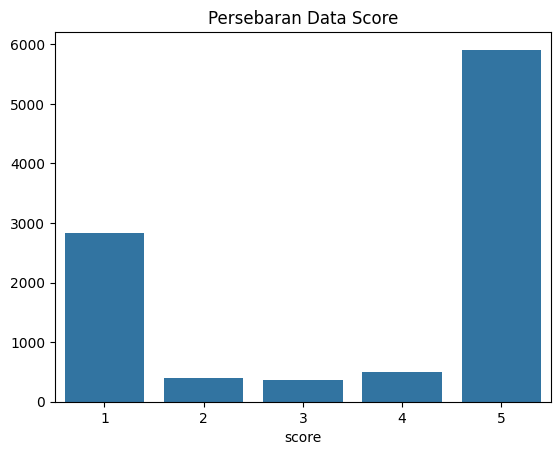

In [ ]:
# Kelompokkan data berdasarkan kolom score
result = df.groupby(['score']).size()
plt.title('Persebaran Data Score')
sns.color_palette("viridis")
# plot the result
sns.barplot(x = result.index, y = result.values)

In [ ]:
# Inisialisasi daftar sentimen
label_num = []

# Iterasi setiap baris dalam DataFrame
for index, row in df.iterrows():
    if row['score'] > 3 :
        label_num.append(1)     # nilai 1 untuk score 4 - 5
    elif row['score'] == 3:
        label_num.append(0)     # nilai 0 untuk score 3
    else:
        label_num.append(-1)    # nilai -1 untuk score 1 - 2

# Tambahkan kolom baru
df['label_num'] = label_num
df

,userName,content,score,at,label_num
0,Pengguna Google,baik sangat membantu sekali,5,2025-04-20 16:13:51,1
1,Pengguna Google,halo pihak gojek saya mau daftar jadi gojek gi...,5,2025-04-20 16:02:20,1
2,Pengguna Google,mantap,5,2025-04-20 15:55:19,1
3,Pengguna Google,"akun tiba2 tersuspen, pasti gara2 kasih bad re...",1,2025-04-20 15:55:15,-1
4,Pengguna Google,mantap,1,2025-04-20 15:49:10,-1
...,...,...,...,...,...
9995,Ilalang Setiawan,Udah sejam nyari kurir ga nemu nemu,1,2025-02-28 16:27:30,-1
9996,Aulia Indahwardhani,gojek sangat membantu apalagi gofood nya yang ...,4,2025-02-28 16:21:38,1
9997,Riski Savitri,Makin parah ini aplikasi gofood nya. Sy udah n...,1,2025-02-28 16:20:17,-1
9998,Fahrizal Husain,"Mesen gocar, dapet driver susah bener. Ada yan...",1,2025-02-28 16:10:16,-1


In [ ]:
# Inisialisasi daftar label
label = []

# Iterasi setiap baris dalam DataFrame
for index, row in df.iterrows():
    if row['score'] > 3 :
        label.append("positive")     # nilai 1 untuk score 4 - 5
    elif row['score'] == 3:
        label.append("neutral")     # nilai 0 untuk score 3
    else:
        label.append("negative")    # nilai -1 untuk score 1 - 2

# Tambahkan kolom baru
df['label'] = label
df

,userName,content,score,at,label_num,label
0,Pengguna Google,baik sangat membantu sekali,5,2025-04-20 16:13:51,1,positive
1,Pengguna Google,halo pihak gojek saya mau daftar jadi gojek gi...,5,2025-04-20 16:02:20,1,positive
2,Pengguna Google,mantap,5,2025-04-20 15:55:19,1,positive
3,Pengguna Google,"akun tiba2 tersuspen, pasti gara2 kasih bad re...",1,2025-04-20 15:55:15,-1,negative
4,Pengguna Google,mantap,1,2025-04-20 15:49:10,-1,negative
...,...,...,...,...,...,...
9995,Ilalang Setiawan,Udah sejam nyari kurir ga nemu nemu,1,2025-02-28 16:27:30,-1,negative
9996,Aulia Indahwardhani,gojek sangat membantu apalagi gofood nya yang ...,4,2025-02-28 16:21:38,1,positive
9997,Riski Savitri,Makin parah ini aplikasi gofood nya. Sy udah n...,1,2025-02-28 16:20:17,-1,negative
9998,Fahrizal Husain,"Mesen gocar, dapet driver susah bener. Ada yan...",1,2025-02-28 16:10:16,-1,negative


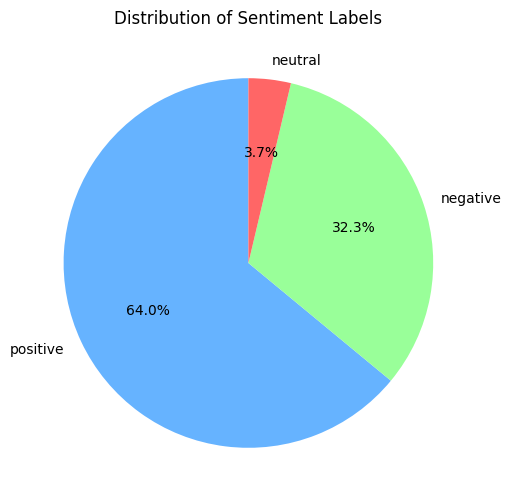

In [ ]:
import matplotlib.pyplot as plt

# Hitung jumlah label pada setiap kategori
label_counts = df['label'].value_counts()

# Buat pie chart
plt.figure(figsize=(6, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99', '#ff6666'])
plt.title('Distribution of Sentiment Labels')
plt.show()

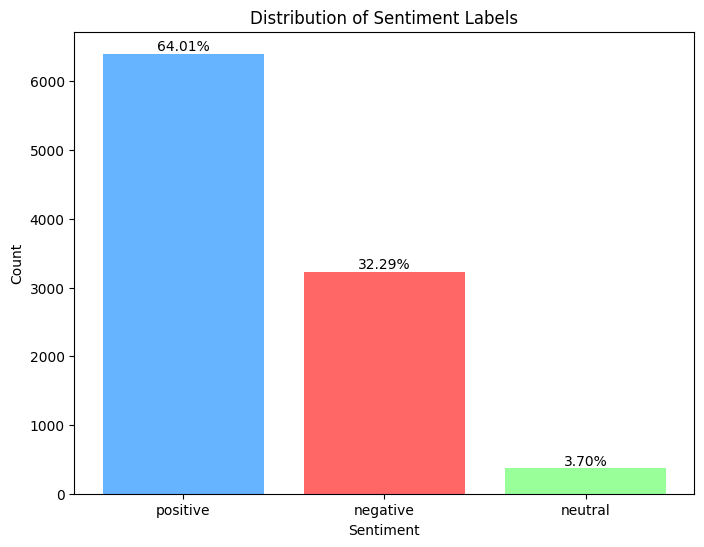

In [ ]:
# Hitung jumlah label pada setiap kategori
label_counts = df['label'].value_counts()

# Hitung persentase untuk setiap kategori
label_percentages = label_counts / label_counts.sum() * 100

# Buat bar chart dan simpan dalam variabel `bars`
plt.figure(figsize=(8, 6))
bars = plt.bar(label_counts.index, label_counts.values, color=['#66b3ff', '#ff6666', '#99ff99'])

# Tambahkan persentase di atas setiap bar
for bar, percentage in zip(bars, label_percentages):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f'{percentage:.2f}%',
        ha='center',
        va='bottom'
    )

plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiment Labels')
plt.show()

### Preprocessing Text

**Proses Pembersihan Teks (Text Preprocessing)**

Kode ini mengimpor pustaka yang diperlukan seperti nltk, re, string, dan pandas, serta mengunduh resource nltk seperti punkt, stopwords, dan wordnet untuk mendukung analisis teks. Fungsi preprocess_text() digunakan untuk membersihkan teks dengan menghapus URL, mention, hashtag, dan karakter khusus, serta mengonversinya menjadi huruf kecil. Selain itu, fungsi ini juga menghapus tanda baca dan spasi berlebih agar teks lebih bersih dan siap untuk diproses lebih lanjut. Fungsi ini kemudian diterapkan ke kolom 'content' dalam dataframe df, menghasilkan kolom baru 'text_Clean' yang berisi teks yang telah diproses.

In [ ]:
%pip install nltk

In [ ]:
import string
import nltk
import re

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import pandas as pd
import re # modul re adalah regular expression

def preprocess_text(text):
    # Menghapus URL
    text = re.sub(r'https\S+', ' ', text, flags=re.IGNORECASE)

    # Mengubah teks jadi lower case
    text = text.lower()

    # Menghapus mention
    text = re.sub(r'@\S+', ' ', text, flags=re.IGNORECASE)

    # Menghapus hashtag
    text = re.sub(r'#\S+', ' ', text, flags=re.IGNORECASE)

    # Menghapus next karakter
    text = re.sub(r"'\w+", ' ', text)

    # Menghapus tanda baca
    text = re.sub(r'[^\w\s]', ' ', text)

    # Menghapus extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# Terapkan fungsi preprocess_text ke kolom 'content'
df['text_Clean'] = df['content'].progress_apply(preprocess_text)
df

100%|██████████| 10000/10000 [00:00<00:00, 66768.93it/s]


,userName,content,score,at,label_num,label,text_Clean
0,Pengguna Google,baik sangat membantu sekali,5,2025-04-20 16:13:51,1,positive,baik sangat membantu sekali
1,Pengguna Google,halo pihak gojek saya mau daftar jadi gojek gi...,5,2025-04-20 16:02:20,1,positive,halo pihak gojek saya mau daftar jadi gojek gi...
2,Pengguna Google,mantap,5,2025-04-20 15:55:19,1,positive,mantap
3,Pengguna Google,"akun tiba2 tersuspen, pasti gara2 kasih bad re...",1,2025-04-20 15:55:15,-1,negative,akun tiba2 tersuspen pasti gara2 kasih bad rev...
4,Pengguna Google,mantap,1,2025-04-20 15:49:10,-1,negative,mantap
...,...,...,...,...,...,...,...
9995,Ilalang Setiawan,Udah sejam nyari kurir ga nemu nemu,1,2025-02-28 16:27:30,-1,negative,udah sejam nyari kurir ga nemu nemu
9996,Aulia Indahwardhani,gojek sangat membantu apalagi gofood nya yang ...,4,2025-02-28 16:21:38,1,positive,gojek sangat membantu apalagi gofood nya yang ...
9997,Riski Savitri,Makin parah ini aplikasi gofood nya. Sy udah n...,1,2025-02-28 16:20:17,-1,negative,makin parah ini aplikasi gofood nya sy udah nu...
9998,Fahrizal Husain,"Mesen gocar, dapet driver susah bener. Ada yan...",1,2025-02-28 16:10:16,-1,negative,mesen gocar dapet driver susah bener ada yang ...


**Proses Normalisasi Teks dengan Kamus Slang**

Kode ini membaca kamus slang dari file Excel 'kamuskatabaku.xlsx' dan menyusunnya dalam bentuk dictionary dengan pasangan kata tidak baku sebagai kunci dan kata baku sebagai nilai. Fungsi ganti_slang() dibuat untuk menggantikan kata-kata slang dalam teks dengan padanan kata baku berdasarkan kamus yang telah disusun. Fungsi ini kemudian diterapkan pada kolom 'text_Clean' dalam dataframe df, menghasilkan kolom baru 'text_Normalization' yang berisi teks yang telah dinormalisasi dengan kata baku.

In [ ]:
# Membaca kamus slang dari file Excel
kamus_slang = pd.read_excel('kamuskatabaku.xlsx')

# Menyusun kamus slang sebagai dictionary: slang -> kata baku
slang_dict = dict(zip(kamus_slang['tidak_baku'], kamus_slang['kata_baku']))

# Fungsi untuk mengganti slang dengan kata baku
def ganti_slang(teks):
    return ' '.join([slang_dict.get(kata, kata) for kata in teks.split()])

In [ ]:
# Menerapkan fungsi ganti_slang pada kolom 'text_StopWord'
df['text_Normalization'] = df['text_Clean'].progress_apply(ganti_slang)
df

100%|██████████| 10000/10000 [00:00<00:00, 263563.95it/s]


,userName,content,score,at,label_num,label,text_Clean,text_Normalization
0,Pengguna Google,baik sangat membantu sekali,5,2025-04-20 16:13:51,1,positive,baik sangat membantu sekali,baik sangat membantu sekali
1,Pengguna Google,halo pihak gojek saya mau daftar jadi gojek gi...,5,2025-04-20 16:02:20,1,positive,halo pihak gojek saya mau daftar jadi gojek gi...,halo pihak gojek saya mau daftar jadi gojek ba...
2,Pengguna Google,mantap,5,2025-04-20 15:55:19,1,positive,mantap,mantap
3,Pengguna Google,"akun tiba2 tersuspen, pasti gara2 kasih bad re...",1,2025-04-20 15:55:15,-1,negative,akun tiba2 tersuspen pasti gara2 kasih bad rev...,akun tiba-tiba tersuspen pasti gara-gara kasih...
4,Pengguna Google,mantap,1,2025-04-20 15:49:10,-1,negative,mantap,mantap
...,...,...,...,...,...,...,...,...
9995,Ilalang Setiawan,Udah sejam nyari kurir ga nemu nemu,1,2025-02-28 16:27:30,-1,negative,udah sejam nyari kurir ga nemu nemu,sudah sejam mencari kurir tidak nemu nemu
9996,Aulia Indahwardhani,gojek sangat membantu apalagi gofood nya yang ...,4,2025-02-28 16:21:38,1,positive,gojek sangat membantu apalagi gofood nya yang ...,gojek sangat membantu apalagi gofood ya yang m...
9997,Riski Savitri,Makin parah ini aplikasi gofood nya. Sy udah n...,1,2025-02-28 16:20:17,-1,negative,makin parah ini aplikasi gofood nya sy udah nu...,makin parah ini aplikasi gofood ya saya sudah ...
9998,Fahrizal Husain,"Mesen gocar, dapet driver susah bener. Ada yan...",1,2025-02-28 16:10:16,-1,negative,mesen gocar dapet driver susah bener ada yang ...,mesen gocar dapat driver susah benar ada yang ...


**Proses Penghapusan Kata Umum (Stopword Removal)**

Kode ini menggunakan pustaka nltk untuk mengunduh dan mengimpor daftar stopwords dalam bahasa Indonesia. Stopwords adalah kata-kata umum yang sering muncul dalam teks tetapi tidak memiliki makna signifikan dalam analisis, seperti "dan", "di", "ke". Fungsi ini menerapkan filter pada kolom 'text_Normalization' untuk menghapus stopwords, menghasilkan kolom baru 'text_StopWord' yang berisi teks yang lebih bersih dan lebih relevan untuk analisis lebih lanjut.

In [ ]:
# Import pustaka nltk dari modul corpus
import nltk.corpus
nltk.download('stopwords') # download stopwords
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Hapus kata - kata umum
stop = stopwords.words('indonesian')
df['text_StopWord'] = df['text_Normalization'].progress_apply(lambda x:' '.join([word for word in x.split() if word not in (stop)]))
df

100%|██████████| 10000/10000 [00:03<00:00, 2889.36it/s]


,userName,content,score,at,label_num,label,text_Clean,text_Normalization,text_StopWord
0,Pengguna Google,baik sangat membantu sekali,5,2025-04-20 16:13:51,1,positive,baik sangat membantu sekali,baik sangat membantu sekali,membantu
1,Pengguna Google,halo pihak gojek saya mau daftar jadi gojek gi...,5,2025-04-20 16:02:20,1,positive,halo pihak gojek saya mau daftar jadi gojek gi...,halo pihak gojek saya mau daftar jadi gojek ba...,halo gojek daftar gojek ya kerja tolong respon...
2,Pengguna Google,mantap,5,2025-04-20 15:55:19,1,positive,mantap,mantap,mantap
3,Pengguna Google,"akun tiba2 tersuspen, pasti gara2 kasih bad re...",1,2025-04-20 15:55:15,-1,negative,akun tiba2 tersuspen pasti gara2 kasih bad rev...,akun tiba-tiba tersuspen pasti gara-gara kasih...,akun tersuspen gara-gara kasih bad review driv...
4,Pengguna Google,mantap,1,2025-04-20 15:49:10,-1,negative,mantap,mantap,mantap
...,...,...,...,...,...,...,...,...,...
9995,Ilalang Setiawan,Udah sejam nyari kurir ga nemu nemu,1,2025-02-28 16:27:30,-1,negative,udah sejam nyari kurir ga nemu nemu,sudah sejam mencari kurir tidak nemu nemu,sejam mencari kurir nemu nemu
9996,Aulia Indahwardhani,gojek sangat membantu apalagi gofood nya yang ...,4,2025-02-28 16:21:38,1,positive,gojek sangat membantu apalagi gofood nya yang ...,gojek sangat membantu apalagi gofood ya yang m...,gojek membantu gofood ya mempermudah membeli m...
9997,Riski Savitri,Makin parah ini aplikasi gofood nya. Sy udah n...,1,2025-02-28 16:20:17,-1,negative,makin parah ini aplikasi gofood nya sy udah nu...,makin parah ini aplikasi gofood ya saya sudah ...,parah aplikasi gofood ya menunggu 3 jam makana...
9998,Fahrizal Husain,"Mesen gocar, dapet driver susah bener. Ada yan...",1,2025-02-28 16:10:16,-1,negative,mesen gocar dapet driver susah bener ada yang ...,mesen gocar dapat driver susah benar ada yang ...,mesen gocar driver susah digantung orderannya ...


**Proses Tokenisasi Teks (Text Tokenization)**

Dalam tahap ini, kode menggunakan metode RegexpTokenizer dari pustaka nltk untuk melakukan tokenisasi teks, yaitu memecah teks menjadi kata-kata individual (tokens). Tokenisasi dilakukan pada kolom 'text_StopWord', yang sebelumnya telah dibersihkan dari stopwords. Hasilnya disimpan dalam kolom baru 'text_Tokenization', di mana setiap ulasan diubah menjadi daftar kata-kata terpisah, sehingga lebih mudah untuk diproses dalam analisis lebih lanjut.

In [ ]:
# impor word_tokenize dari modul nltk
from nltk.tokenize import sent_tokenize, word_tokenize

In [ ]:
# Melakukan tokenize menggunakan Regexp
from nltk.tokenize import RegexpTokenizer
regexp = RegexpTokenizer('\w+')
df['text_Tokenization']=df['text_StopWord'].progress_apply(regexp.tokenize)
df

100%|██████████| 10000/10000 [00:00<00:00, 23752.65it/s]


,userName,content,score,at,label_num,label,text_Clean,text_Normalization,text_StopWord,text_Tokenization
0,Pengguna Google,baik sangat membantu sekali,5,2025-04-20 16:13:51,1,positive,baik sangat membantu sekali,baik sangat membantu sekali,membantu,[membantu]
1,Pengguna Google,halo pihak gojek saya mau daftar jadi gojek gi...,5,2025-04-20 16:02:20,1,positive,halo pihak gojek saya mau daftar jadi gojek gi...,halo pihak gojek saya mau daftar jadi gojek ba...,halo gojek daftar gojek ya kerja tolong respon...,"[halo, gojek, daftar, gojek, ya, kerja, tolong..."
2,Pengguna Google,mantap,5,2025-04-20 15:55:19,1,positive,mantap,mantap,mantap,[mantap]
3,Pengguna Google,"akun tiba2 tersuspen, pasti gara2 kasih bad re...",1,2025-04-20 15:55:15,-1,negative,akun tiba2 tersuspen pasti gara2 kasih bad rev...,akun tiba-tiba tersuspen pasti gara-gara kasih...,akun tersuspen gara-gara kasih bad review driv...,"[akun, tersuspen, gara, gara, kasih, bad, revi..."
4,Pengguna Google,mantap,1,2025-04-20 15:49:10,-1,negative,mantap,mantap,mantap,[mantap]
...,...,...,...,...,...,...,...,...,...,...
9995,Ilalang Setiawan,Udah sejam nyari kurir ga nemu nemu,1,2025-02-28 16:27:30,-1,negative,udah sejam nyari kurir ga nemu nemu,sudah sejam mencari kurir tidak nemu nemu,sejam mencari kurir nemu nemu,"[sejam, mencari, kurir, nemu, nemu]"
9996,Aulia Indahwardhani,gojek sangat membantu apalagi gofood nya yang ...,4,2025-02-28 16:21:38,1,positive,gojek sangat membantu apalagi gofood nya yang ...,gojek sangat membantu apalagi gofood ya yang m...,gojek membantu gofood ya mempermudah membeli m...,"[gojek, membantu, gofood, ya, mempermudah, mem..."
9997,Riski Savitri,Makin parah ini aplikasi gofood nya. Sy udah n...,1,2025-02-28 16:20:17,-1,negative,makin parah ini aplikasi gofood nya sy udah nu...,makin parah ini aplikasi gofood ya saya sudah ...,parah aplikasi gofood ya menunggu 3 jam makana...,"[parah, aplikasi, gofood, ya, menunggu, 3, jam..."
9998,Fahrizal Husain,"Mesen gocar, dapet driver susah bener. Ada yan...",1,2025-02-28 16:10:16,-1,negative,mesen gocar dapet driver susah bener ada yang ...,mesen gocar dapat driver susah benar ada yang ...,mesen gocar driver susah digantung orderannya ...,"[mesen, gocar, driver, susah, digantung, order..."


**Proses Stemming (Stemming Teks)**

Pada tahap ini, kode menggunakan pustaka Sastrawi untuk melakukan stemming, yaitu proses mengubah kata berimbuhan menjadi bentuk dasarnya. Dengan menggunakan StemmerFactory dari Sastrawi, setiap kata dalam kolom 'text_Tokenization' diproses agar kembali ke akar katanya. Hasil stemming ini disimpan dalam kolom 'text_Stemmindo', yang nantinya dapat digunakan untuk analisis lebih lanjut, seperti klasifikasi sentimen atau pemodelan teks lainnya.

In [ ]:
%pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 7.8 MB/s eta 0:00:00


In [ ]:
# import Sastrawi package
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [ ]:
# Melakukan stemming dari tokens
df['text_Stemmindo'] = df['text_Tokenization'].progress_apply(lambda x: [stemmer.stem(y) for y in x])

100%|██████████| 10000/10000 [11:02<00:00, 15.09it/s]


In [ ]:
# Tampilkan DataFrame
df

,userName,content,score,at,label_num,label,text_Clean,text_Normalization,text_StopWord,text_Tokenization,text_Stemmindo
0,Pengguna Google,baik sangat membantu sekali,5,2025-04-20 16:13:51,1,positive,baik sangat membantu sekali,baik sangat membantu sekali,membantu,[membantu],[bantu]
1,Pengguna Google,halo pihak gojek saya mau daftar jadi gojek gi...,5,2025-04-20 16:02:20,1,positive,halo pihak gojek saya mau daftar jadi gojek gi...,halo pihak gojek saya mau daftar jadi gojek ba...,halo gojek daftar gojek ya kerja tolong respon...,"[halo, gojek, daftar, gojek, ya, kerja, tolong...","[halo, gojek, daftar, gojek, ya, kerja, tolong..."
2,Pengguna Google,mantap,5,2025-04-20 15:55:19,1,positive,mantap,mantap,mantap,[mantap],[mantap]
3,Pengguna Google,"akun tiba2 tersuspen, pasti gara2 kasih bad re...",1,2025-04-20 15:55:15,-1,negative,akun tiba2 tersuspen pasti gara2 kasih bad rev...,akun tiba-tiba tersuspen pasti gara-gara kasih...,akun tersuspen gara-gara kasih bad review driv...,"[akun, tersuspen, gara, gara, kasih, bad, revi...","[akun, tersuspen, gara, gara, kasih, bad, revi..."
4,Pengguna Google,mantap,1,2025-04-20 15:49:10,-1,negative,mantap,mantap,mantap,[mantap],[mantap]
...,...,...,...,...,...,...,...,...,...,...,...
9995,Ilalang Setiawan,Udah sejam nyari kurir ga nemu nemu,1,2025-02-28 16:27:30,-1,negative,udah sejam nyari kurir ga nemu nemu,sudah sejam mencari kurir tidak nemu nemu,sejam mencari kurir nemu nemu,"[sejam, mencari, kurir, nemu, nemu]","[jam, cari, kurir, nemu, nemu]"
9996,Aulia Indahwardhani,gojek sangat membantu apalagi gofood nya yang ...,4,2025-02-28 16:21:38,1,positive,gojek sangat membantu apalagi gofood nya yang ...,gojek sangat membantu apalagi gofood ya yang m...,gojek membantu gofood ya mempermudah membeli m...,"[gojek, membantu, gofood, ya, mempermudah, mem...","[gojek, bantu, gofood, ya, mudah, beli, makan,..."
9997,Riski Savitri,Makin parah ini aplikasi gofood nya. Sy udah n...,1,2025-02-28 16:20:17,-1,negative,makin parah ini aplikasi gofood nya sy udah nu...,makin parah ini aplikasi gofood ya saya sudah ...,parah aplikasi gofood ya menunggu 3 jam makana...,"[parah, aplikasi, gofood, ya, menunggu, 3, jam...","[parah, aplikasi, gofood, ya, tunggu, 3, jam, ..."
9998,Fahrizal Husain,"Mesen gocar, dapet driver susah bener. Ada yan...",1,2025-02-28 16:10:16,-1,negative,mesen gocar dapet driver susah bener ada yang ...,mesen gocar dapat driver susah benar ada yang ...,mesen gocar driver susah digantung orderannya ...,"[mesen, gocar, driver, susah, digantung, order...","[mesen, gocar, driver, susah, gantung, order, ..."


In [ ]:
# Melakukan string dari stemming
df['text_String'] = df['text_Stemmindo'].progress_apply(lambda x: ' '.join([item for item in x if len(item)>3]))
df

100%|██████████| 10000/10000 [00:00<00:00, 387618.55it/s]


,userName,content,score,at,label_num,label,text_Clean,text_Normalization,text_StopWord,text_Tokenization,text_Stemmindo,text_String
0,Pengguna Google,baik sangat membantu sekali,5,2025-04-20 16:13:51,1,positive,baik sangat membantu sekali,baik sangat membantu sekali,membantu,[membantu],[bantu],bantu
1,Pengguna Google,halo pihak gojek saya mau daftar jadi gojek gi...,5,2025-04-20 16:02:20,1,positive,halo pihak gojek saya mau daftar jadi gojek gi...,halo pihak gojek saya mau daftar jadi gojek ba...,halo gojek daftar gojek ya kerja tolong respon...,"[halo, gojek, daftar, gojek, ya, kerja, tolong...","[halo, gojek, daftar, gojek, ya, kerja, tolong...",halo gojek daftar gojek kerja tolong respon te...
2,Pengguna Google,mantap,5,2025-04-20 15:55:19,1,positive,mantap,mantap,mantap,[mantap],[mantap],mantap
3,Pengguna Google,"akun tiba2 tersuspen, pasti gara2 kasih bad re...",1,2025-04-20 15:55:15,-1,negative,akun tiba2 tersuspen pasti gara2 kasih bad rev...,akun tiba-tiba tersuspen pasti gara-gara kasih...,akun tersuspen gara-gara kasih bad review driv...,"[akun, tersuspen, gara, gara, kasih, bad, revi...","[akun, tersuspen, gara, gara, kasih, bad, revi...",akun tersuspen gara gara kasih review driver c...
4,Pengguna Google,mantap,1,2025-04-20 15:49:10,-1,negative,mantap,mantap,mantap,[mantap],[mantap],mantap
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Ilalang Setiawan,Udah sejam nyari kurir ga nemu nemu,1,2025-02-28 16:27:30,-1,negative,udah sejam nyari kurir ga nemu nemu,sudah sejam mencari kurir tidak nemu nemu,sejam mencari kurir nemu nemu,"[sejam, mencari, kurir, nemu, nemu]","[jam, cari, kurir, nemu, nemu]",cari kurir nemu nemu
9996,Aulia Indahwardhani,gojek sangat membantu apalagi gofood nya yang ...,4,2025-02-28 16:21:38,1,positive,gojek sangat membantu apalagi gofood nya yang ...,gojek sangat membantu apalagi gofood ya yang m...,gojek membantu gofood ya mempermudah membeli m...,"[gojek, membantu, gofood, ya, mempermudah, mem...","[gojek, bantu, gofood, ya, mudah, beli, makan,...",gojek bantu gofood mudah beli makan alangkah b...
9997,Riski Savitri,Makin parah ini aplikasi gofood nya. Sy udah n...,1,2025-02-28 16:20:17,-1,negative,makin parah ini aplikasi gofood nya sy udah nu...,makin parah ini aplikasi gofood ya saya sudah ...,parah aplikasi gofood ya menunggu 3 jam makana...,"[parah, aplikasi, gofood, ya, menunggu, 3, jam...","[parah, aplikasi, gofood, ya, tunggu, 3, jam, ...",parah aplikasi gofood tunggu makan ganti resto...
9998,Fahrizal Husain,"Mesen gocar, dapet driver susah bener. Ada yan...",1,2025-02-28 16:10:16,-1,negative,mesen gocar dapet driver susah bener ada yang ...,mesen gocar dapat driver susah benar ada yang ...,mesen gocar driver susah digantung orderannya ...,"[mesen, gocar, driver, susah, digantung, order...","[mesen, gocar, driver, susah, gantung, order, ...",mesen gocar driver susah gantung order cancel ...


In [ ]:
# melihat informasi dari dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   userName            10000 non-null  object
 1   content             10000 non-null  object
 2   score               10000 non-null  int64 
 3   at                  10000 non-null  object
 4   label_num           10000 non-null  int64 
 5   label               10000 non-null  object
 6   text_Clean          10000 non-null  object
 7   text_Normalization  10000 non-null  object
 8   text_StopWord       10000 non-null  object
 9   text_Tokenization   10000 non-null  object
 10  text_Stemmindo      10000 non-null  object
 11  text_String         10000 non-null  object
dtypes: int64(2), object(10)
memory usage: 937.6+ KB


**Proses Analisis Sentimen dan Visualisasi Word Cloud**

Pada tahap ini, data tweets yang telah melalui proses pembersihan akan dianalisis berdasarkan polaritas sentimen (positif atau negatif). DataFrame positive_tweets dibuat dengan menyaring tweet yang memiliki label 'positive', kemudian diurutkan berdasarkan score secara menurun. Sebaliknya, DataFrame negative_tweets berisi tweet berlabel 'negative', yang diurutkan berdasarkan score secara menaik dan dipilih 10 tweet teratas.

Selanjutnya, untuk memvisualisasikan kata-kata yang paling sering muncul dalam tweet, digunakan WordCloud. WordCloud pertama dibuat menggunakan semua tweet yang telah difilter dan dibersihkan. Kemudian, WordCloud dibuat secara terpisah untuk tweet negatif dan positif, dengan masing-masing ditampilkan menggunakan matplotlib untuk melihat pola umum dari teks berdasarkan sentimen.

In [ ]:
# Mengatur opsi tampilan Pandas agar kolom dapat menampilkan teks hingga 3000 karakter.
pd.set_option('display.max_colwidth', 3000)

# Membuat DataFrame baru 'positive_tweets' yang hanya berisi tweet dengan polaritas positif.
positive_tweets = df[df['label'] == 'positive']

# Print the available columns for inspection
print(df.columns)

# Access only existing columns. Replace with actual column names if needed.
# I'm assuming you meant 'content', 'score', 'label', 'text_Clean', etc. based on your previous code.
positive_tweets = positive_tweets[['content', 'score', 'label', 'text_Clean']]

# Mengurutkan DataFrame 'positive_tweets' berdasarkan 'polarity_score' secara menurun.
# Replace 'score' with the actual column name that you want to sort by
positive_tweets = positive_tweets.sort_values(by='score', ascending=False)

# Mengatur ulang indeks DataFrame agar dimulai dari 0.
positive_tweets = positive_tweets.reset_index(drop=True)

# Menambahkan 1 ke semua indeks DataFrame.
positive_tweets.index += 1

Index(['userName', 'content', 'score', 'at', 'label_num', 'label',
       'text_Clean', 'text_Normalization', 'text_StopWord',
       'text_Tokenization', 'text_Stemmindo', 'text_String'],
      dtype='object')


In [ ]:
# Mengatur opsi tampilan Pandas agar kolom dapat menampilkan teks hingga 3000 karakter.
pd.set_option('display.max_colwidth', 3000)

# Membuat DataFrame baru 'negative_tweets' yang hanya berisi tweet dengan polaritas negatif.
# Assuming 'df' is your main DataFrame after preprocessing
negative_tweets = df[df['label'] == 'negative']  # Changed 'clean_df' to 'df' and 'polarity' to 'label'

# Memilih hanya kolom-kolom tertentu dari DataFrame 'negative_tweets'.
# Adjust column names if needed based on your DataFrame
negative_tweets = negative_tweets[['content', 'score', 'label', 'text_Clean']]  # Changed column names

# Mengurutkan DataFrame 'negative_tweets' berdasarkan 'polarity_score' secara menaik (ascending).
# Changed sorting column to 'score'
negative_tweets = negative_tweets.sort_values(by='score', ascending=True)

# Memilih 10 baris pertama dari DataFrame yang sudah diurutkan.
negative_tweets = negative_tweets[0:10]

# Mengatur ulang indeks DataFrame agar dimulai dari 0.
negative_tweets = negative_tweets.reset_index(drop=True)

# Menambahkan 1 ke semua indeks DataFrame.
negative_tweets.index += 1

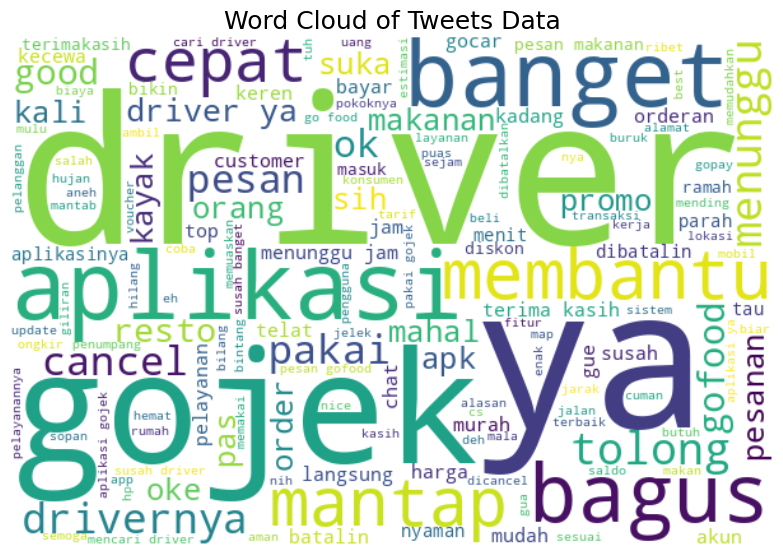

In [ ]:
# Menggabungkan kata dalam setiap tweet dan kemudian menggabungkan semua tweet menjadi satu string besar
# Changed the list comprehension to join the list of words into a string first
# Corrected the variable name to `df` to use the processed dataframe
# Ensure that 'tweet' is a string and handle potential non-string values
list_words = ' '.join([' '.join(str(tweet).split()) for tweet in df['text_StopWord'] if isinstance(tweet, (str, list))])

# Membuat objek WordCloud dengan parameter tertentu
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

# Membuat gambar dan sumbu untuk menampilkan word cloud
fig, ax = plt.subplots(figsize=(8, 6))

# Menetapkan judul untuk word cloud
ax.set_title('Word Cloud of Tweets Data', fontsize=18)

# Menonaktifkan grid pada sumbu
ax.grid(False)

# Menampilkan word cloud dalam gambar
ax.imshow(wordcloud, interpolation='bilinear')

# Mengatur layout gambar
fig.tight_layout(pad=0)

# Menyembunyikan sumbu
ax.axis('off')

# Menampilkan word cloud
plt.show()

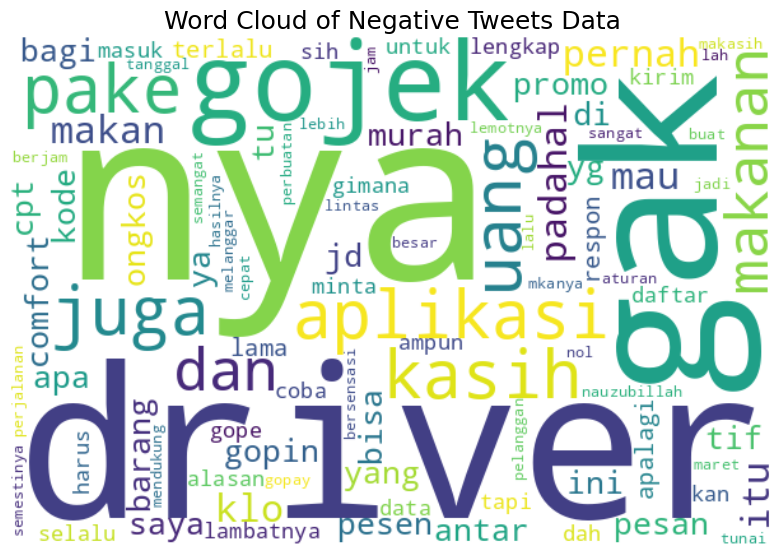

In [ ]:
# Gabungkan semua tweet negatif menjadi satu string besar
list_words = ' '.join(negative_tweets['text_Clean'].astype(str).tolist())

# Membuat objek WordCloud dengan parameter tertentu
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

# Membuat gambar dan sumbu untuk menampilkan word cloud
fig, ax = plt.subplots(figsize=(8, 6))

# Menetapkan judul untuk word cloud
ax.set_title('Word Cloud of Negative Tweets Data', fontsize=18)

# Menonaktifkan grid pada sumbu
ax.grid(False)

# Menampilkan word cloud dalam gambar
ax.imshow(wordcloud, interpolation='bilinear')

# Mengatur layout gambar
fig.tight_layout(pad=0)

# Menyembunyikan sumbu
ax.axis('off')

# Menampilkan word cloud
plt.show()


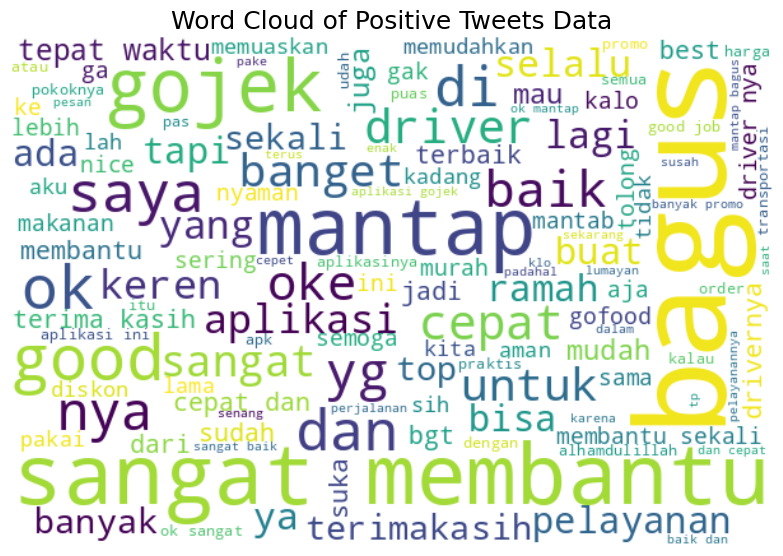

In [ ]:
list_words = ' '.join(positive_tweets['text_Clean'].astype(str).tolist())
# Membuat objek WordCloud dengan parameter tertentu
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

# Membuat gambar dan sumbu untuk menampilkan word cloud
fig, ax = plt.subplots(figsize=(8, 6))

# Menetapkan judul untuk word cloud
ax.set_title('Word Cloud of Positive Tweets Data', fontsize=18)

# Menonaktifkan grid pada sumbu
ax.grid(False)

# Menampilkan word cloud dalam gambar
ax.imshow(wordcloud, interpolation='bilinear')

# Mengatur layout gambar
fig.tight_layout(pad=0)

# Menyembunyikan sumbu
ax.axis('off')

# Menampilkan word cloud
plt.show()

**Visualisasi**

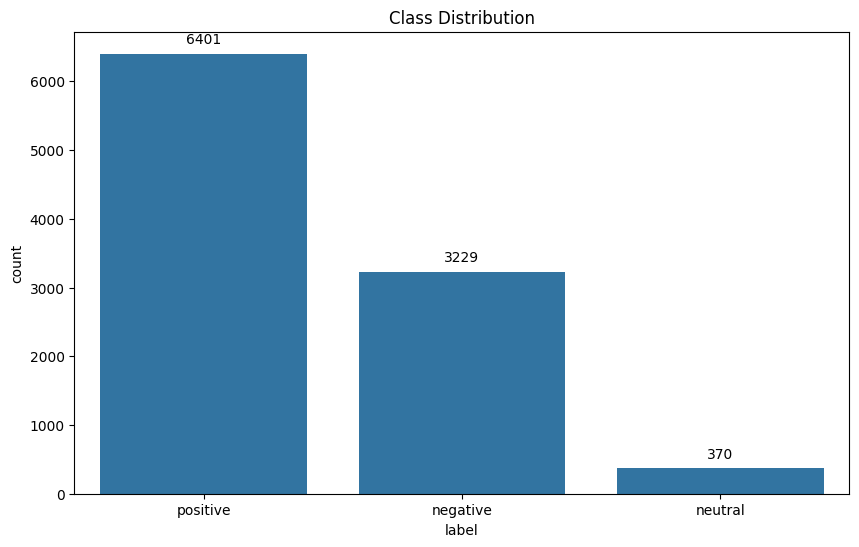

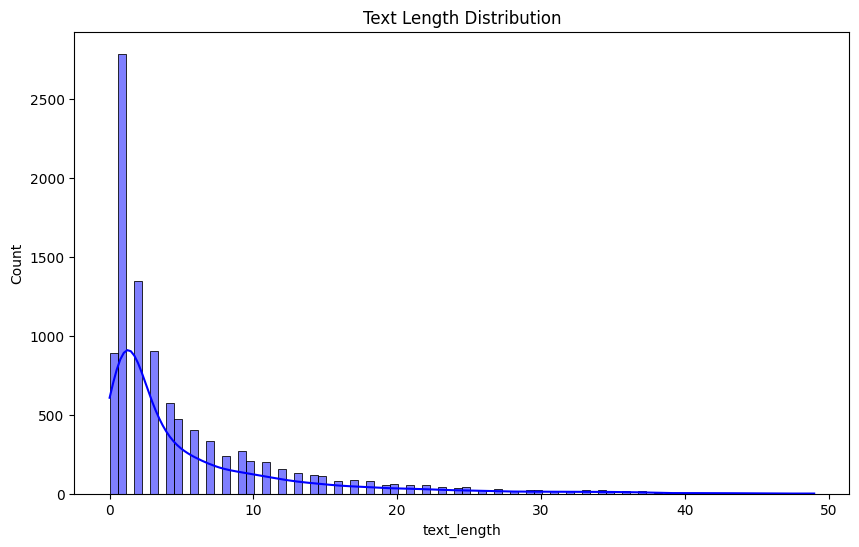

<ipython-input-35-fddad0d0da00>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='jumlah', y='word', data=word_frequencies, palette="Blues_d")


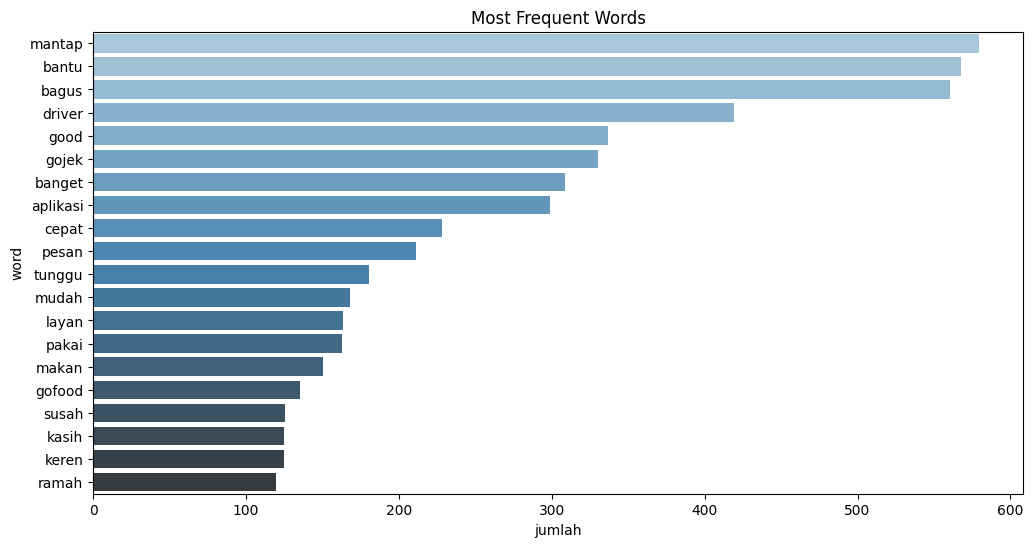

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

# 1. **Class Distribution Plot**
plt.figure(figsize=(10, 6))
# Replace 'clean_df' with 'df' and 'polarity' with 'label'
class_dist_plot = sns.countplot(x='label', data=df)
plt.title('Class Distribution')

# Add counts above the bars on the plot
for p in class_dist_plot.patches:
    class_dist_plot.annotate(format(p.get_height(), '.0f'),
                              (p.get_x() + p.get_width() / 2., p.get_height()),
                              ha='center', va='center',
                              xytext=(0, 10),
                              textcoords='offset points')

plt.show()

# 2. **Text Length Distribution Plot**
plt.figure(figsize=(10, 6))
# Replace 'clean_df' with 'df' and 'text_akhir' with 'text_String'
df['text_length'] = df['text_String'].apply(lambda x: len(str(x).split())) # Calculate text length, ensuring x is a string
sns.histplot(df['text_length'], kde=True, color='blue')  # Added KDE for better view of distribution
plt.title('Text Length Distribution')
plt.show()

# 3. **Most Frequent Words Visualization**
plt.figure(figsize=(12, 6))

# We will limit the number of words to consider to speed up the process.
vectorizer = TfidfVectorizer(max_features=1000)  # Limit to top 1000 features for better performance
# Replace 'text_akhir' with 'text_String'
X = vectorizer.fit_transform(df['text_String'])

# Convert the sparse matrix to dense matrix
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Sum the tf-idf values for each word across all tweets
word_frequencies = tfidf_df.sum(axis=0).reset_index(name='jumlah')
word_frequencies.columns = ['word', 'jumlah']  # Rename columns for better clarity

# Sort the words based on their frequency
word_frequencies = word_frequencies.sort_values('jumlah', ascending=False).head(20)

# Plot the most frequent words
sns.barplot(x='jumlah', y='word', data=word_frequencies, palette="Blues_d")
plt.title('Most Frequent Words')
plt.show()

**Menyimpan Hasil PreProcessing Text**

In [ ]:
# Simpan hasilnya
df.to_csv('hasil_Preprocessing_gojek.csv',index= False)

**Load Data PreProcessing Text**

In [38]:
df = pd.read_csv('/content/hasil_Preprocessing_gojek.csv')

In [39]:
# Tampilkan Text String
df['text_String']

,text_String
0,bantu
1,halo gojek daftar gojek kerja tolong respon te...
2,mantap
3,akun tersuspen gara gara kasih review driver c...
4,mantap
...,...
9995,cari kurir nemu nemu
9996,gojek bantu gofood mudah beli makan alangkah b...
9997,parah aplikasi gofood tunggu makan ganti resto...
9998,mesen gocar driver susah gantung order cancel ...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   userName            10000 non-null  object
 1   content             10000 non-null  object
 2   score               10000 non-null  int64 
 3   at                  10000 non-null  object
 4   label_num           10000 non-null  int64 
 5   label               10000 non-null  object
 6   text_Clean          9898 non-null   object
 7   text_Normalization  9898 non-null   object
 8   text_StopWord       9730 non-null   object
 9   text_Tokenization   10000 non-null  object
 10  text_Stemmindo      10000 non-null  object
 11  text_String         9113 non-null   object
 12  text_length         10000 non-null  int64 
dtypes: int64(3), object(10)
memory usage: 1015.8+ KB


In [40]:
# Basic Operation
import pandas as pd
import numpy as np

# Text Preprocessing & Cleaning
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import re
from wordcloud import WordCloud,STOPWORDS
from nltk import SnowballStemmer

from tqdm import tqdm

from sklearn.model_selection import train_test_split # Split Data
from imblearn.over_sampling import SMOTE # Handling Imbalanced

# Model Building
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report , confusion_matrix , accuracy_score # Performance Metrics

# Data Visualization
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [41]:
X = df['text_String'].fillna('')  # Fitur utama berbasis teks
y = df['label_num']  # Label target numerik

In [42]:
X

,text_String
0,bantu
1,halo gojek daftar gojek kerja tolong respon te...
2,mantap
3,akun tersuspen gara gara kasih review driver c...
4,mantap
...,...
9995,cari kurir nemu nemu
9996,gojek bantu gofood mudah beli makan alangkah b...
9997,parah aplikasi gofood tunggu makan ganti resto...
9998,mesen gocar driver susah gantung order cancel ...


In [43]:
y

,label_num
0,1
1,1
2,1
3,-1
4,-1
...,...
9995,-1
9996,1
9997,-1
9998,-1


In [44]:
import numpy as np

unique, counts = np.unique(y, return_counts=True)
print(dict(zip(unique, counts)))


{-1: 3229, 0: 370, 1: 6401}


In [45]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout, GlobalMaxPooling1D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import numpy as np

# Fill NaN values with an empty string
df['text_String'] = df['text_String'].fillna('')

# Inisialisasi Tokenizer dengan jumlah kata maksimum dan token OOV
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")

# Tokenisasi teks
tokenizer.fit_on_texts(df['text_String'])

# Mengubah teks menjadi sequence
X_seq = tokenizer.texts_to_sequences(df['text_String'])

# Padding sequence (gunakan maxlen yang sama di seluruh kode)
max_length = 50  # Sesuaikan dengan panjang rata-rata teks
X_pad = pad_sequences(X_seq, maxlen=max_length, padding='post', truncating='post')

# Konversi y ke numpy array (agar tidak ada error di train_test_split)
y = np.array(y)

# Split data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, random_state=42, stratify=y)


### CNN Modeling

In [34]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Misalkan data sudah disiapkan dalam X (fitur) dan y (label)
# Menggabungkan kelas 0 dengan -1
y = np.where(y == 0, -1, y)  # Mengubah label kelas 0 menjadi -1

# Split dataset menjadi data training dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Encode label (karena kita menggabungkan dua kelas menjadi satu, pastikan kelas -1 dan 1 terkode dengan benar)
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# Tokenisasi dan padding teks
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>") # Sesuaikan num_words jika perlu
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
max_length = 100 # Sesuaikan max_length jika perlu
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length, padding='post', truncating='post')

# Membuat Model CNN 1D (cocok untuk teks)
model = models.Sequential([
    layers.Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=max_length),
    layers.Conv1D(filters=64, kernel_size=5, activation='relu'),
    layers.MaxPooling1D(pool_size=4),
    layers.LSTM(units=128, dropout=0.3, recurrent_dropout=0.3),
    layers.Dense(3, activation='softmax')  # 3 kelas (kombinasi -1 dan 1)
])

# Kompilasi Model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Early Stopping untuk menghentikan pelatihan jika tidak ada peningkatan
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Penyesuaian class weights untuk mengatasi ketidakseimbangan kelas
class_weight = {0: 1.5, 1: 1.0}  # Sesuaikan bobot sesuai kebutuhan

# Melatih Model
history = model.fit(X_train_pad, y_train, epochs=20, batch_size=32, validation_data=(X_test_pad, y_test), callbacks=[early_stopping], class_weight=class_weight)

# Evaluasi Model pada Data Uji
test_loss, test_acc = model.evaluate(X_test_pad, y_test, verbose=2)

# Prediksi pada Data Uji
y_pred = model.predict(X_test_pad)
y_pred_classes = np.argmax(y_pred, axis=1)

# Menampilkan hasil evaluasi
print(f"\nTest Accuracy: {test_acc}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_classes))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))


Epoch 1/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 31s 95ms/step - accuracy: 0.6081 - loss: 0.7917 - val_accuracy: 0.8980 - val_loss: 0.2640
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 39s 89ms/step - accuracy: 0.9034 - loss: 0.3180 - val_accuracy: 0.9225 - val_loss: 0.2243
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 43s 99ms/step - accuracy: 0.9357 - loss: 0.2292 - val_accuracy: 0.9205 - val_loss: 0.2377
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 39s 91ms/step - accuracy: 0.9567 - loss: 0.1728 - val_accuracy: 0.9220 - val_loss: 0.2354
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 39s 85ms/step - accuracy: 0.9651 - loss: 0.1452 - val_accuracy: 0.9165 - val_loss: 0.2599
63/63 - 1s - 16ms/step - accuracy: 0.9165 - loss: 0.2599
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step

Test Accuracy: 0.9164999723434448

Confusion Matrix:
[[ 618   88]
 [  79 1215]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.88      0.88       706
           1       0.93      0.94      

**Optimasi CNN + LSTM Model**

In [58]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.utils.class_weight import compute_class_weight

# Misalkan data sudah disiapkan dalam X (fitur teks) dan y (label)
# Contoh X: ["text sample 1", "text sample 2", ...], y: [0, 1, 0, ...]
# Gantilah X dan y dengan data aktual yang Anda miliki

# Menggabungkan kelas 0 dengan -1
y = np.where(y == 0, -1, y)  # Mengubah label kelas 0 menjadi -1

# Split dataset menjadi data training dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Encode label (karena kita menggabungkan dua kelas menjadi satu, pastikan kelas -1 dan 1 terkode dengan benar)
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# Tokenisasi dan padding teks
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")  # Sesuaikan num_words jika perlu
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
max_length = 100  # Sesuaikan max_length jika perlu
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length, padding='post', truncating='post')

# Membuat Model CNN + LSTM untuk klasifikasi teks
model = models.Sequential([
    layers.Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=max_length),
    layers.Conv1D(filters=64, kernel_size=5, activation='relu'),
    layers.MaxPooling1D(pool_size=4),
    layers.LSTM(units=128, dropout=0.3, recurrent_dropout=0.3),
    layers.Dense(3, activation='softmax')  # 3 kelas (kombinasi -1 dan 1)
])

# Kompilasi Model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Early Stopping untuk menghentikan pelatihan jika tidak ada peningkatan
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Penyesuaian class weights untuk mengatasi ketidakseimbangan kelas
class_weight = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weight = dict(zip(np.unique(y_train), class_weight))  # Sesuaikan bobot sesuai kebutuhan

# Melatih Model
history = model.fit(X_train_pad, y_train, epochs=20, batch_size=32, validation_data=(X_test_pad, y_test),
                    callbacks=[early_stopping], class_weight=class_weight)

Epoch 1/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 32s 112ms/step - accuracy: 0.5509 - loss: 0.6924 - val_accuracy: 0.8890 - val_loss: 0.3252
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 30s 119ms/step - accuracy: 0.8974 - loss: 0.2831 - val_accuracy: 0.9225 - val_loss: 0.2238
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 21s 85ms/step - accuracy: 0.9387 - loss: 0.1866 - val_accuracy: 0.8965 - val_loss: 0.2695
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 42s 91ms/step - accuracy: 0.9511 - loss: 0.1571 - val_accuracy: 0.9190 - val_loss: 0.2511
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 42s 95ms/step - accuracy: 0.9625 - loss: 0.1305 - val_accuracy: 0.9200 - val_loss: 0.2620


63/63 - 1s - 16ms/step - accuracy: 0.9200 - loss: 0.2620
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step
Train Accuracy: 0.9585000276565552
Test Accuracy: 0.9200000166893005

Confusion Matrix:
[[ 642   64]
 [  96 1198]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       706
           1       0.95      0.93      0.94      1294

    accuracy                           0.92      2000
   macro avg       0.91      0.92      0.91      2000
weighted avg       0.92      0.92      0.92      2000



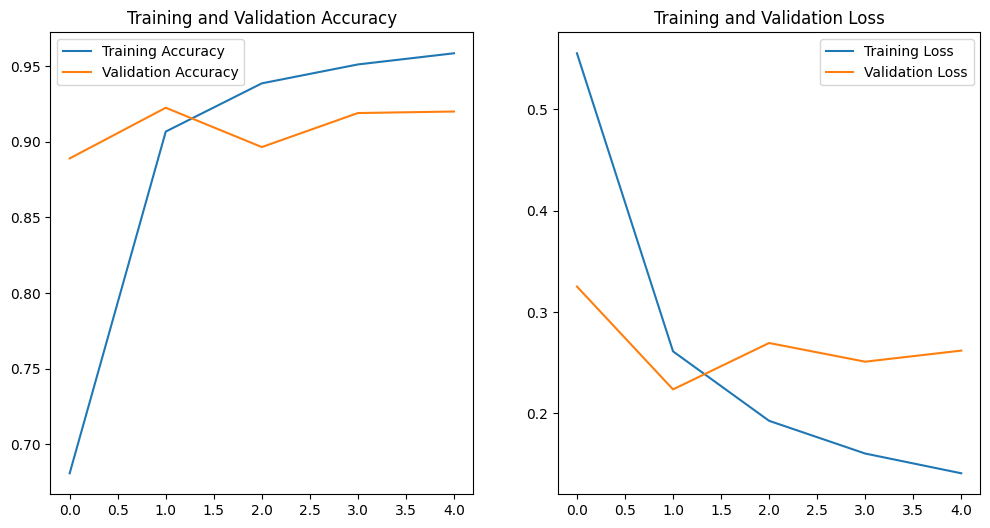

In [59]:
# Evaluasi Model pada Data Uji
test_loss, test_acc = model.evaluate(X_test_pad, y_test, verbose=2)

# Prediksi pada Data Uji
y_pred = model.predict(X_test_pad)
y_pred_classes = np.argmax(y_pred, axis=1)

# Mengambil akurasi train dan test dari history
train_cnn_acc = history.history['accuracy'][-1]  # Akurasi training di epoch terakhir
test_cnn_acc = test_acc  # Akurasi testing yang sudah dihitung dari model.evaluate

# Menampilkan hasil evaluasi
print(f"Train Accuracy: {train_cnn_acc}")
print(f"Test Accuracy: {test_cnn_acc}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_classes))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))

# Plotting the training history (Accuracy and Loss)
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [74]:
# Menyimpan model ke file .h5
model.save('text_classification_CNN+LSTM_model.h5')


### RNN Modeling

**1. Define Modeling**

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import L2

# One-Hot Encoding untuk multi-kelas (-1,0,1 → 0,1,2)
y_train_encoded = to_categorical(y_train + 1, num_classes=3)
y_test_encoded = to_categorical(y_test + 1, num_classes=3)

# Model RNN dengan LSTM
model_rnn = Sequential()

# Embedding Layer dengan dimensi 200 (bisa coba 100 atau 256)
embedding_dim = 200
model_rnn.add(Embedding(input_dim=len(tokenizer.word_index) + 1,
                        output_dim=embedding_dim,
                        input_length=max_length))

# Bidirectional LSTM Layer dengan Regularization
model_rnn.add(Bidirectional(LSTM(128, return_sequences=False,
                                  dropout=0.4, recurrent_dropout=0.4,
                                  kernel_regularizer=L2(0.01))))

# Fully Connected Layers dengan Dropout lebih besar
model_rnn.add(Dense(64, activation='relu'))
model_rnn.add(Dropout(0.5))  # Dropout lebih tinggi untuk mengurangi overfitting

# Output Layer (Softmax untuk multi-kelas)
model_rnn.add(Dense(3, activation='softmax'))  # 3 kelas (-1,0,1)

# Optimizer AdamW dengan Learning Rate lebih kecil dan Weight Decay
optimizer = AdamW(learning_rate=0.0001, weight_decay=1e-6)

# Compile Model
model_rnn.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Callback untuk Early Stopping & Cosine Annealing Scheduler
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6)

# Train Model
history_rnn = model_rnn.fit(X_train, y_train_encoded,
                            epochs=20,
                            validation_data=(X_test, y_test_encoded),
                            batch_size=128,  # Bisa coba 256 jika RAM cukup
                            callbacks=[early_stopping, reduce_lr])


Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 65s 873ms/step - accuracy: 0.5805 - loss: 6.4800 - val_accuracy: 0.6400 - val_loss: 5.4097 - learning_rate: 1.0000e-04
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 82s 878ms/step - accuracy: 0.6995 - loss: 5.1917 - val_accuracy: 0.7905 - val_loss: 4.4147 - learning_rate: 1.0000e-04
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 81s 858ms/step - accuracy: 0.7761 - loss: 4.2794 - val_accuracy: 0.8055 - val_loss: 3.6552 - learning_rate: 1.0000e-04
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 55s 860ms/step - accuracy: 0.8100 - loss: 3.5314 - val_accuracy: 0.8175 - val_loss: 3.0377 - learning_rate: 1.0000e-04
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 81s 863ms/step - accuracy: 0.8075 - loss: 2.9481 - val_accuracy: 0.8245 - val_loss: 2.5283 - learning_rate: 1.0000e-04
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 84s 877ms/step - accuracy: 0.8073 - loss: 2.4602 - val_accuracy: 0.8375 - val_loss: 2.1054 - learning_rate: 1.0000e-04
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 80s 860ms/step - acc

**2. Evaluasi Model**

In [47]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import numpy as np

# Prediksi probabilitas pada data training dan testing
y_train_pred_probs = model_rnn.predict(X_train)
y_test_pred_probs = model_rnn.predict(X_test)

# Convert probabilities to class labels (Multiclass)
y_train_pred = np.argmax(y_train_pred_probs, axis=1) - 1  # Shift kembali dari (0,1,2) ke (-1,0,1)
y_test_pred = np.argmax(y_test_pred_probs, axis=1) - 1

# Evaluasi Akurasi
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

# Precision, Recall, F1-Score (Gunakan 'macro' averaging untuk seimbang antar kelas)
train_precision = precision_score(y_train, y_train_pred, average='macro')
train_recall = recall_score(y_train, y_train_pred, average='macro')
train_f1 = f1_score(y_train, y_train_pred, average='macro')

test_precision = precision_score(y_test, y_test_pred, average='macro')
test_recall = recall_score(y_test, y_test_pred, average='macro')
test_f1 = f1_score(y_test, y_test_pred, average='macro')

# Menampilkan hasil evaluasi
print("="*50)
print("📊 Evaluasi Model RNN (LSTM)")
print("="*50)
print(f"✅ Train Accuracy:   {train_acc:.4f}")
print(f"✅ Test Accuracy:    {test_acc:.4f}")
print("-"*50)
print(f"📌 Train Precision: {train_precision:.4f}")
print(f"📌 Test Precision:  {test_precision:.4f}")
print("-"*50)
print(f"📌 Train Recall:    {train_recall:.4f}")
print(f"📌 Test Recall:     {test_recall:.4f}")
print("-"*50)
print(f"📌 Train F1-score:  {train_f1:.4f}")
print(f"📌 Test F1-score:   {test_f1:.4f}")
print("="*50)

# Confusion Matrix
print("\n🔹 Confusion Matrix (Test Set):")
print(confusion_matrix(y_test, y_test_pred))

# Classification Report
print("\n🔹 Classification Report (Test Set):")
print(classification_report(y_test, y_test_pred, digits=4))


250/250 ━━━━━━━━━━━━━━━━━━━━ 18s 62ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step
📊 Evaluasi Model RNN (LSTM)
✅ Train Accuracy:   0.9084
✅ Test Accuracy:    0.8850
--------------------------------------------------
📌 Train Precision: 0.5956
📌 Test Precision:  0.5780
--------------------------------------------------
📌 Train Recall:    0.6233
📌 Test Recall:     0.6053
--------------------------------------------------
📌 Train F1-score:  0.6090
📌 Test F1-score:   0.5912

🔹 Confusion Matrix (Test Set):
[[ 565    0   81]
 [  60    0   14]
 [  75    0 1205]]

🔹 Classification Report (Test Set):
              precision    recall  f1-score   support

          -1     0.8071    0.8746    0.8395       646
           0     0.0000    0.0000    0.0000        74
           1     0.9269    0.9414    0.9341      1280

    accuracy                         0.8850      2000
   macro avg     0.5780    0.6053    0.5912      2000
weighted avg     0.8539    0.8850    0.8690      2000



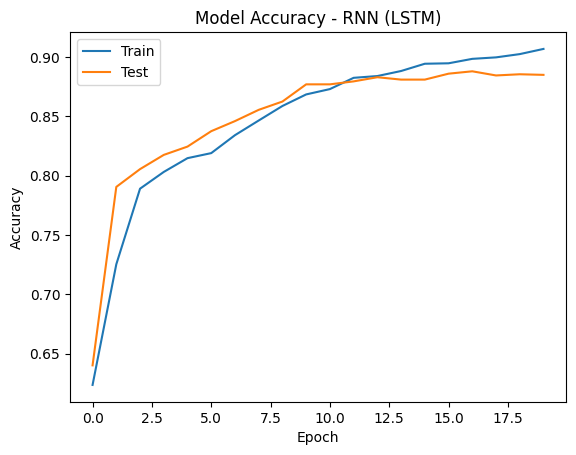

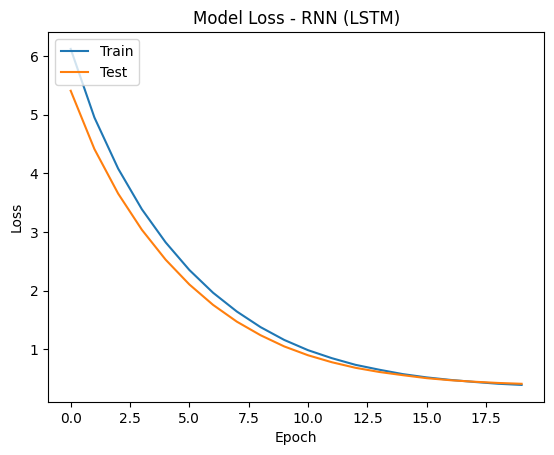

In [48]:
import matplotlib.pyplot as plt

# Visualisasi Akurasi untuk Model RNN
plt.plot(history_rnn.history['accuracy'])  # Akurasi model RNN
plt.plot(history_rnn.history['val_accuracy'])  # Akurasi validasi model RNN
plt.title('Model Accuracy - RNN (LSTM)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Visualisasi Loss untuk Model RNN
plt.plot(history_rnn.history['loss'])  # Loss model RNN
plt.plot(history_rnn.history['val_loss'])  # Loss validasi model RNN
plt.title('Model Loss - RNN (LSTM)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


**3. Save Model**

In [49]:
# Simpan model ke dalam format HDF5
model_rnn.save("model_rnn.h5")

### **Skema 1: Optimasi Lebih Lanjut SVM + TF-IDF (80/20)**

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# ---------------------------- SKEMA 1: Optimasi SVM + TF-IDF (80/20) ----------------------------
print("\n🔹 Skema 1: Optimasi Lebih Lanjut SVM + TF-IDF (80/20)")

# TF-IDF dengan lebih banyak fitur dan trigram
tfidf_vectorizer = TfidfVectorizer(max_features=10_000, ngram_range=(1,3), sublinear_tf=True, stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(df['text_String'])

# Split Data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df['label_num'], test_size=0.2, random_state=42)

# Train SVM Model dengan C lebih besar dan kernel RBF
svm_model = SVC(kernel='rbf', C=3.0, gamma='scale')  # Gunakan kernel RBF untuk menangkap pola kompleks
svm_model.fit(X_train, y_train)

# Prediksi pada Training Data
svm_train_pred = svm_model.predict(X_train)
accuracy_train_svm = accuracy_score(y_train, svm_train_pred)

# Prediksi pada Testing Data
svm_test_pred = svm_model.predict(X_test)
accuracy_test_svm = accuracy_score(y_test, svm_test_pred)

# Print Akurasi
print(f"✅ Akurasi SVM pada Data Training: {accuracy_train_svm:.2%}")
print(f"✅ Akurasi SVM pada Data Testing: {accuracy_test_svm:.2%}")



🔹 Skema 1: Optimasi Lebih Lanjut SVM + TF-IDF (80/20)
✅ Akurasi SVM pada Data Training: 98.54%
✅ Akurasi SVM pada Data Testing: 89.10%


### **Skema 2: Perbaikan Overfitting RF + Word2Vec (80/20)**

In [51]:
from gensim.models import Word2Vec
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# ---------------------------- SKEMA 2: Perbaikan Overfitting RF + Word2Vec ----------------------------
print("\n🔹 Skema 2: Perbaikan Overfitting RF + Word2Vec (80/20)")

# Word2Vec Model dengan vector_size lebih kecil & window yang optimal
tokenized_texts = [text.split() for text in df['text_String']]
w2v_model = Word2Vec(sentences=tokenized_texts, vector_size=100, window=5, min_count=2, workers=4)
word_vectors = w2v_model.wv

# Fungsi untuk rata-rata vektor kata dalam teks
def get_avg_word2vec(text, model, vector_size):
    words = text.split()
    feature_vec = np.zeros((vector_size,), dtype="float32")
    count = 0
    for word in words:
        if word in model:
            feature_vec += model[word]
            count += 1
    return feature_vec / max(count, 1)  # Hindari pembagian dengan nol

X_w2v = np.array([get_avg_word2vec(text, word_vectors, 100) for text in df['text_String']])

# Standarisasi Fitur
scaler = StandardScaler()
X_w2v = scaler.fit_transform(X_w2v)

# Reduksi Dimensi dengan PCA untuk mengurangi noise
pca = PCA(n_components=50)  # Turunkan dari 100 fitur ke 50
X_w2v = pca.fit_transform(X_w2v)

# Split Data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_w2v, df['label_num'], test_size=0.2, random_state=42)

# Train Random Forest Model dengan parameter lebih optimal
rf_model_w2v = RandomForestClassifier(n_estimators=300, max_depth=20, min_samples_split=5, random_state=42)
rf_model_w2v.fit(X_train, y_train)

# Evaluasi Model pada Training Data
rf_train_pred_w2v = rf_model_w2v.predict(X_train)
accuracy_train_rf_w2v = accuracy_score(y_train, rf_train_pred_w2v)

# Evaluasi Model pada Testing Data
rf_test_pred_w2v = rf_model_w2v.predict(X_test)
accuracy_test_rf_w2v = accuracy_score(y_test, rf_test_pred_w2v)

# Print Akurasi
print(f"✅ Akurasi RF pada Data Training: {accuracy_train_rf_w2v:.2%}")
print(f"✅ Akurasi RF pada Data Testing: {accuracy_test_rf_w2v:.2%}")



🔹 Skema 2: Perbaikan Overfitting RF + Word2Vec (80/20)
✅ Akurasi RF pada Data Training: 97.75%
✅ Akurasi RF pada Data Testing: 86.30%


### **Skema 3: Optimasi RF + TF-IDF (70/30)**

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# ---------------------------- SKEMA 3: Optimasi RF + TF-IDF (70/30) ----------------------------
print("\n🔹 Skema 3: Optimasi RF + TF-IDF (70/30)")

# TF-IDF dengan parameter lebih optimal
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english', ngram_range=(1,2))
X_tfidf = tfidf_vectorizer.fit_transform(df['text_String'])

# Standarisasi Fitur (Opsional, bisa dicoba untuk stabilisasi model)
scaler = StandardScaler(with_mean=False)
X_tfidf = scaler.fit_transform(X_tfidf)

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df['label_num'], test_size=0.3, random_state=42)

# Optimasi Random Forest dengan GridSearchCV
param_grid = {
    'n_estimators': [300, 500],
    'max_depth': [15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Train Model dengan Hyperparameter Terbaik
best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)

# Evaluasi Model pada Training Data
rf_train_pred_tfidf = best_rf.predict(X_train)
accuracy_train_rf_tfidf = accuracy_score(y_train, rf_train_pred_tfidf)

# Evaluasi Model pada Testing Data
rf_test_pred_tfidf = best_rf.predict(X_test)
accuracy_test_rf_tfidf = accuracy_score(y_test, rf_test_pred_tfidf)

# Print Akurasi
print(f"✅ Akurasi RF pada Data Training: {accuracy_train_rf_tfidf:.2%}")
print(f"✅ Akurasi RF pada Data Testing: {accuracy_test_rf_tfidf:.2%}")

# Print Best Parameters
print(f"🔍 Hyperparameter Terbaik: {grid_search.best_params_}")



🔹 Skema 3: Optimasi RF + TF-IDF (70/30)
✅ Akurasi RF pada Data Training: 97.50%
✅ Akurasi RF pada Data Testing: 88.10%
🔍 Hyperparameter Terbaik: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 500}


In [ ]:
import joblib

# Simpan ulang model
joblib.dump(best_rf, '/content/best_rf_model.joblib', compress=3)
joblib.dump(tfidf_vectorizer, '/content/tfidf_vectorizer.joblib', compress=3)
joblib.dump(scaler, '/content/scaler.joblib', compress=3)

print("✅ Model dan objek lainnya berhasil disimpan ulang.")


In [ ]:
joblib.dump(best_rf, '/content/best_rf_model.pkl')
joblib.dump(tfidf_vectorizer, '/content/tfidf_vectorizer.pkl')
joblib.dump(scaler, '/content/scaler.pkl')

print("✅ Model berhasil disimpan ulang dalam format .pkl")


**Evaluasi Perbandingan Model Skema**

In [60]:
# Print Akurasi untuk Semua Model
# Print Akurasi untuk Semua Model
print("\n📊 Perbandingan Akurasi Model:\n")

print(f"✅ CNN + LSTM - Training: {train_cnn_acc} | Testing: {test_cnn_acc}")
print(f"✅ RNN - Training: {train_acc:.4f} | Testing: {test_acc:.4f}")
print(f"✅ SVM + TF-IDF (80/20) - Training: {accuracy_train_svm:.2%} | Testing: {accuracy_test_svm:.2%}")
print(f"✅ RF + Word2Vec (80/20) - Training: {accuracy_train_rf_w2v:.2%} | Testing: {accuracy_test_rf_w2v:.2%}")
print(f"✅ RF + TF-IDF (70/30) - Training: {accuracy_train_rf_tfidf:.2%} | Testing: {accuracy_test_rf_tfidf:.2%}")
print(f"✅ RF + TF-IDF (70/30) - Training: {accuracy_train_rf_tfidf:.2%} | Testing: {accuracy_test_rf_tfidf:.2%}")



📊 Perbandingan Akurasi Model:

✅ CNN + LSTM - Training: 0.9585000276565552 | Testing: 0.9200000166893005
✅ RNN - Training: 0.9084 | Testing: 0.9200
✅ SVM + TF-IDF (80/20) - Training: 95.28% | Testing: 89.50%
✅ RF + Word2Vec (80/20) - Training: 97.75% | Testing: 86.30%
✅ RF + TF-IDF (70/30) - Training: 97.50% | Testing: 88.10%
✅ RF + TF-IDF (70/30) - Training: 97.50% | Testing: 88.10%


Berikut adalah perbandingan akurasi model berdasarkan hasil yang telah Anda berikan dan perbandingan antara beberapa model yang digunakan untuk klasifikasi sentimen:

📊 Perbandingan Akurasi Model:
1. CNN + LSTM
- Training: 95.85%
- Testing: 92.00%
- Kesimpulan: Model CNN + LSTM menunjukkan performa yang sangat baik pada data training dan testing, dengan akurasi yang tinggi pada kedua set data. Model ini memberikan keseimbangan yang baik antara training dan testing, serta kemampuan generalisasi yang cukup baik pada data uji.

2. RNN
- Training: 90.84%
- Testing: 92.00%
- Kesimpulan: RNN menunjukkan sedikit penurunan performa pada data training dibandingkan dengan model CNN + LSTM, namun tetap memberikan akurasi testing yang sama baiknya. Ini menunjukkan bahwa RNN dapat memberikan hasil yang cukup stabil meskipun tidak sebaik CNN + LSTM dalam hal training.

3. SVM + TF-IDF (80/20)
- Training: 95.28%
- Testing: 89.50%
- Kesimpulan: Model SVM + TF-IDF memberikan akurasi training yang sangat tinggi, namun terdapat perbedaan yang cukup besar dengan akurasi testing, yang menunjukkan bahwa model ini mungkin mengalami overfitting pada data training. Meskipun demikian, model ini tetap menunjukkan kinerja yang solid pada data testing.

4. RF + Word2Vec (80/20)
- Training: 97.75%
- Testing: 86.30%
- Kesimpulan: Model Random Forest (RF) dengan representasi Word2Vec memiliki akurasi training yang sangat tinggi, namun akurasi testingnya lebih rendah dibandingkan model lain, menunjukkan bahwa representasi Word2Vec dalam konfigurasi ini belum memberikan performa terbaik untuk tugas klasifikasi sentimen.

5. RF + TF-IDF (70/30)
- Training: 97.50%
- Testing: 88.10%
- Kesimpulan: Model Random Forest (RF) dengan representasi TF-IDF memberikan akurasi testing yang solid dan lebih baik dibandingkan RF + Word2Vec. Meskipun akurasi trainingnya tinggi, performa pada data testing lebih stabil dan memberikan keseimbangan yang lebih baik dibandingkan dengan model RF + Word2Vec.

Kesimpulan Umum:
- CNN + LSTM dan RNN memberikan akurasi testing yang sangat baik, namun CNN + LSTM sedikit lebih unggul dalam hal akurasi training dan testing.
- SVM + TF-IDF menunjukkan akurasi training yang sangat tinggi, tetapi perbedaan yang besar dengan akurasi testing menunjukkan adanya overfitting.
- Random Forest + TF-IDF (70/30) memberikan keseimbangan terbaik antara akurasi training dan testing, dan model ini lebih generalisasi terhadap data baru, meskipun akurasi trainingnya sedikit lebih rendah dari model lainnya.

Secara keseluruhan, CNN + LSTM memberikan hasil terbaik di antara model lainnya dalam hal akurasi testing. Namun, Random Forest + TF-IDF (70/30) juga dapat menjadi pilihan yang sangat baik karena memberikan keseimbangan antara akurasi dan kemampuan generalisasi.

### Testing Model Terbaik

Program ini menganalisis sentimen teks menggunakan model CNN + LSTM. Teks yang dimasukkan oleh pengguna akan melalui tahap preprocessing, seperti penghapusan URL, tanda baca, stopwords, serta konversi ke huruf kecil. Setelah itu, teks dikonversi menjadi vektor numerik menggunakan TF-IDF, dinormalisasi dengan StandardScaler, lalu diproses oleh model Random Forest untuk menentukan sentimennya. Jika hasil prediksi menunjukkan 1, maka sentimen positif (✅ POSITIF), sedangkan jika 0, maka sentimen negatif (❌ NEGATIF). Dengan kombinasi preprocessing yang baik, representasi fitur yang optimal, serta model yang telah disempurnakan, program ini mampu memberikan hasil analisis sentimen dengan akurasi tinggi. 🚀

In [76]:
import numpy as np
import re
import nltk
from keras.preprocessing.sequence import pad_sequences
from keras.models import load_model
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.text import Tokenizer

# Download stopwords (if not already downloaded)
nltk.download('stopwords')

# Load the trained CNN+LSTM model
model_cnn_lstm = load_model('/content/text_classification_CNN+LSTM_model.h5')  # Update path as needed

# Define the tokenizer and max sequence length used during training
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
max_sequence_length = 100  # Replace with the max_sequence_length used during training

# Assuming tokenizer is trained on the training dataset (if you're reusing the same tokenizer)
# tokenizer.fit_on_texts(X_train)  # Uncomment and train on the original dataset if needed

# Preprocessing functions
def cleaningText(text):
    # Remove URL
    text = re.sub(r'https\S+', ' ', text, flags=re.IGNORECASE)
    # Convert to lowercase
    text = text.lower()
    # Remove mentions (@)
    text = re.sub(r'@\S+', ' ', text, flags=re.IGNORECASE)
    # Remove hashtags (#)
    text = re.sub(r'#\S+', ' ', text, flags=re.IGNORECASE)
    # Remove any special characters or unwanted symbols
    text = re.sub(r"[^\w\s]", " ", text)
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    return text

def casefoldingText(text):
    return text.lower()

def fix_slangwords(text):
    # Add slang replacement logic here if necessary
    return text

def tokenizingText(text):
    tokenizer = RegexpTokenizer(r'\w+')
    return tokenizer.tokenize(text)

def filteringText(text):
    stop = stopwords.words('indonesian')
    return [word for word in text if word not in stop]

def toSentence(list_words):
    return ' '.join(list_words)

# Function to prepare text for CNN+LSTM model
def prepare_input_for_cnn_lstm(text, tokenizer, max_sequence_length):
    # Tokenization and padding
    sequence = tokenizer.texts_to_sequences([text])

    # Check if sequence is empty and handle it
    if sequence == [[]]:  # If the sequence is empty after tokenization
        # You can either return an array of zeros or handle it differently
        # Here, we return an array of zeros with the correct shape
        padded_sequence = np.zeros((1, max_sequence_length), dtype=np.int32)
    else:
        # Replace None values with 0 before padding
        sequence = [[x if x is not None else 0 for x in sublist] for sublist in sequence]
        padded_sequence = pad_sequences(sequence, maxlen=max_sequence_length, dtype=np.int32) # Ensure dtype is specified

    return padded_sequence

# Get user input
kalimat_baru = input("Masukkan kalimat baru: ")

# Preprocess the input text
kalimat_baru_cleaned = cleaningText(kalimat_baru)
kalimat_baru_casefolded = casefoldingText(kalimat_baru_cleaned)
kalimat_baru_slangfixed = fix_slangwords(kalimat_baru_casefolded)
kalimat_baru_tokenized = tokenizingText(kalimat_baru_slangfixed)
kalimat_baru_filtered = filteringText(kalimat_baru_tokenized)
kalimat_baru_final = toSentence(kalimat_baru_filtered)

# Prepare the input text for the CNN+LSTM model
X_kalimat_baru = prepare_input_for_cnn_lstm(kalimat_baru_final, tokenizer, max_sequence_length)

# Make predictions using the CNN+LSTM model
prediksi_sentimen = model_cnn_lstm.predict(X_kalimat_baru)

# Get the index of the class with the highest probability
predicted_class_index = np.argmax(prediksi_sentimen[0])

# Map the class index to sentiment label with "NEGATIVE_NEUTRAL" combined
if predicted_class_index == 0 or predicted_class_index == 1:
    sentiment_label = "NEGATIVE_NEUTRAL"
else:
    sentiment_label = "POSITIVE"

# Display the result
print(f"✅ Sentimen kalimat baru adalah {sentiment_label}.")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Masukkan kalimat baru: setuju
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
✅ Sentimen kalimat baru adalah NEGATIVE_NEUTRAL.


In [77]:
pip freeze requirements.txt

absl-py==1.4.0
accelerate==1.5.2
aiohappyeyeballs==2.6.1
aiohttp==3.11.15
aiosignal==1.3.2
alabaster==1.0.0
albucore==0.0.23
albumentations==2.0.5
ale-py==0.10.2
altair==5.5.0
annotated-types==0.7.0
anyio==4.9.0
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array_record==0.7.1
arviz==0.21.0
astropy==7.0.1
astropy-iers-data==0.2025.4.14.0.37.22
astunparse==1.6.3
atpublic==5.1
attrs==25.3.0
audioread==3.0.1
autograd==1.7.0
babel==2.17.0
backcall==0.2.0
backports.tarfile==1.2.0
beautifulsoup4==4.13.4
betterproto==2.0.0b6
bigframes==1.42.0
bigquery-magics==0.9.0
bleach==6.2.0
blinker==1.9.0
blis==1.3.0
blosc2==3.3.0
bokeh==3.6.3
Bottleneck==1.4.2
bqplot==0.12.44
branca==0.8.1
CacheControl==0.14.2
cachetools==5.5.2
catalogue==2.0.10
certifi==2025.1.31
cffi==1.17.1
chardet==5.2.0
charset-normalizer==3.4.1
chex==0.1.89
clarabel==0.10.0
click==8.1.8
cloudpathlib==0.21.0
cloudpickle==3.1.1
cmake==3.31.6
cmdstanpy==1.2.5
colorcet==3.1.0
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confe